## **<font color = blue>1. When to use SVM?</font>**

The major limitation of K-NN (K nearest neighbour) is that it is difficult to categorize data when it is dense.
For instance, if the co-ordinates are closely spaced to each other, the machine finds it very difficult to categroize it
into one class.
This limitation of K-NN is then overcome using SVM (i.e. Support Vector Machine) algorithm.
SVM is used for both classification & regression problems.
Primarily, SVM is used for binary & multi-class Classification.

<font color = red>**SVM is suited when we have more number of columns than the number of rows.**</font>

Such a data is called high-dimensional data. It is the data where the number of variables are high as compared to the number of observations.



## <font color = blue>**2. What is Linearly and Non-linearly separable data?**</font>

Linearly separable data is the data where you can partition the data into classes simply by putting a line between them.

However, there are scenarios where one cannot separate the data by simply putting a linear line. Part of the reason might
be due to it's non-linear nature, such data is called as Non-linearly separable data.
One example of a Non-linearly separable data is data in concentric patches.

SVM works on both Linearly & Non-linearly separable data.

## **<font color = blue>3. What does one mean by Support Vector?</font>**

**<font color = red>The datapoint of a class which is at the extreme ends of the class as well as the one which is closest to another class
is called as the Support Vector of that class.</font>**
Once we find the Support vectors we draw a hyperplane passing through both these co-ordinates and then draw a margin through the centre of this hyperplane, which we define as maximum margin.

So in the case of a densely populated data, even if the data points are closely packed we could easily differentiate with
the help of this maximum margin. This makes the classification a lot simpler.


In [1]:
from google.colab import files
from IPython.display import Image

In [2]:
uploaded = files.upload()

Saving SVM_image.png to SVM_image.png


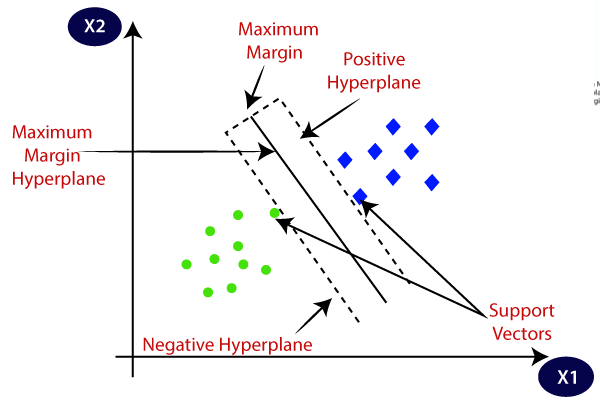

In [3]:
Image('SVM_image.png')

If we look at the above figure,it tells us clearly how support vectors can be used to create hyperplane & maximum
margin which can further classify the data better.
The dimensions of the hyperplane depends upon the features present in the dataset, which means if there are 2 features,
then the hyperplane will be a straight line, if there are 3 features then the hyperplane will be a 2 dimensional plane.

We always create a hyperplane that has maximum margin, which means maximum distance between the data points.

## **<font color = blue>4. What is a Hyperparameter?</font>**

In Machine Learning it is difficult to tune the algorithm based on different datasets. To make it possible, we tune
the model using a hyperparameter, which is basically a user defined variable which can be used to tune the model as per
the different datasets in order to achieve a desired accuracy for that model.

In SVM, we have 3 hyperparameters alpha, beta & gamma.

------------------------------------------------------------------------------------------------------------------------

# Code

### **<font color = blue>1. Importing the Libraries</font>**

Let us import the necessary libraries first.

In [ ]:
import numpy as np
import pandas as pd

### **<font color = blue>2. Reading the training & testing data</font>**

We are working on 2 datasets both of them already split into train and test data. The data contains information about Loan Applicants and their Loan statuses in the form of 'Yes' (Y) or 'No' (N) indicating whether they are eligible for the loan or not.

In [ ]:
train_data = pd.read_csv(r'risk_analytics_train.csv',index_col=0,header=0)
test_data = pd.read_csv(r'risk_analytics_test.csv',index_col=0,header=0)

### **<font color = blue>3. Preprocessing</font>**

#### **<font color = green>3.1 Checking the dimensions</font>**

Let us check the size of the data.

In [ ]:
print(train_data.shape)
print(test_data.shape)

(614, 12)
(367, 11)


In [ ]:
#Preview the train & test data

train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#### **<font color = green>3.2 Null value & special characters treatment</font>**

Let us check for any null values in the dataset.

In [ ]:
#Check for null values
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
test_data.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

So as evident above, we do have null values in training as well as testing dataset. Let us treat them.

For Null value treatment in dataset, we are going to replace the null values in the columns with their corresponding modes for categorical columns and for numeric column (which is just 'LoanAmount') we are replacing null values with the mean of the column.

In [ ]:
# Treating the null values
# Inputing Categorical missing data with "mode" value

colname1 = ["Gender","Married","Dependents","Self_Employed","Loan_Amount_Term"]

for x in colname1:
    train_data[x].fillna(train_data[x].mode()[0],inplace=True)
    test_data[x].fillna(test_data[x].mode()[0],inplace=True)

print(train_data.isnull().sum())
print(test_data.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64


In [ ]:
# Inputing the numeric values with "mean" value

train_data["LoanAmount"].fillna(round(train_data["LoanAmount"].mean(),0),inplace = True)
test_data["LoanAmount"].fillna(round(test_data["LoanAmount"].mean(),0),inplace = True)

print(train_data.isnull().sum())
print(test_data.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64


In [ ]:
# So from above we got to know that we are still yet to replace the null values from credit history

train_data["Credit_History"].fillna(value=0,inplace = True)
test_data["Credit_History"].fillna(value=0,inplace = True)

print(train_data.isnull().sum())
print(test_data.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


#### **<font color = green>3.3 Label Encoding</font>**

Once done replacing all the null values in the dataset, we need to do Label encoding on categorical data. This is important because, categorical data should not be passed as it is to a machine learning algorithm. It might prove as a hindrance to predict values.

So we collect all the categorical columns in variable 'colname' and apply
label encoding to each one of them by using a for loop.

Inside this for loop, we are performing fit_transform using the variable 'le' where we have our LabelEncoder() function stored.

LabelEncoder function is imported from the preprocessing sublibrary of the sklearn library.

In [ ]:
#Converting all the categorical data into numerical for train_data

from sklearn.preprocessing import LabelEncoder

colname = ["Gender","Married","Education","Self_Employed","Dependents","Self_Employed","Property_Area","Loan_Status"]

le = LabelEncoder()

for x in colname:
    train_data[x]=le.fit_transform(train_data[x])

In [ ]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0.0,146.0,360.0,1.0,2,1
LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


We repeat the same process for test_data as well.

In [ ]:
#Converting all the categorical data into numerical for test_data

from sklearn.preprocessing import LabelEncoder

colname = ["Gender","Married","Education","Self_Employed","Property_Area"]

le = LabelEncoder()

for x in colname:
    test_data[x]=le.fit_transform(test_data[x])

In [ ]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,1,1,0.0,0,0,5720,0,110.0,360.0,1.0,2
LP001022,1,1,1.0,0,0,3076,1500,126.0,360.0,1.0,2
LP001031,1,1,2.0,0,0,5000,1800,208.0,360.0,1.0,2
LP001035,1,1,2.0,0,0,2340,2546,100.0,360.0,0.0,2
LP001051,1,0,0.0,1,0,3276,0,78.0,360.0,1.0,2


#### **<font color = green>3.4 Checking Correlation</font>**

To check how different columns are correlated we can do EDA using heatmap.
For heatmap, it is essential that we import seaborn library first.

'plt.figure(figsize=(20,30))' gives the dimension of the image.

From seaborn we use heatmap function to plot a heatmap. train_data.corr() will give us a correlation matrix plot, the values vmin = -1.0 and vmax = 1.0 will set the color gradient for all correlation values between -1.0 to 1.0.

'annot = True' will display the numeric values on the heatmap.

<Axes: >

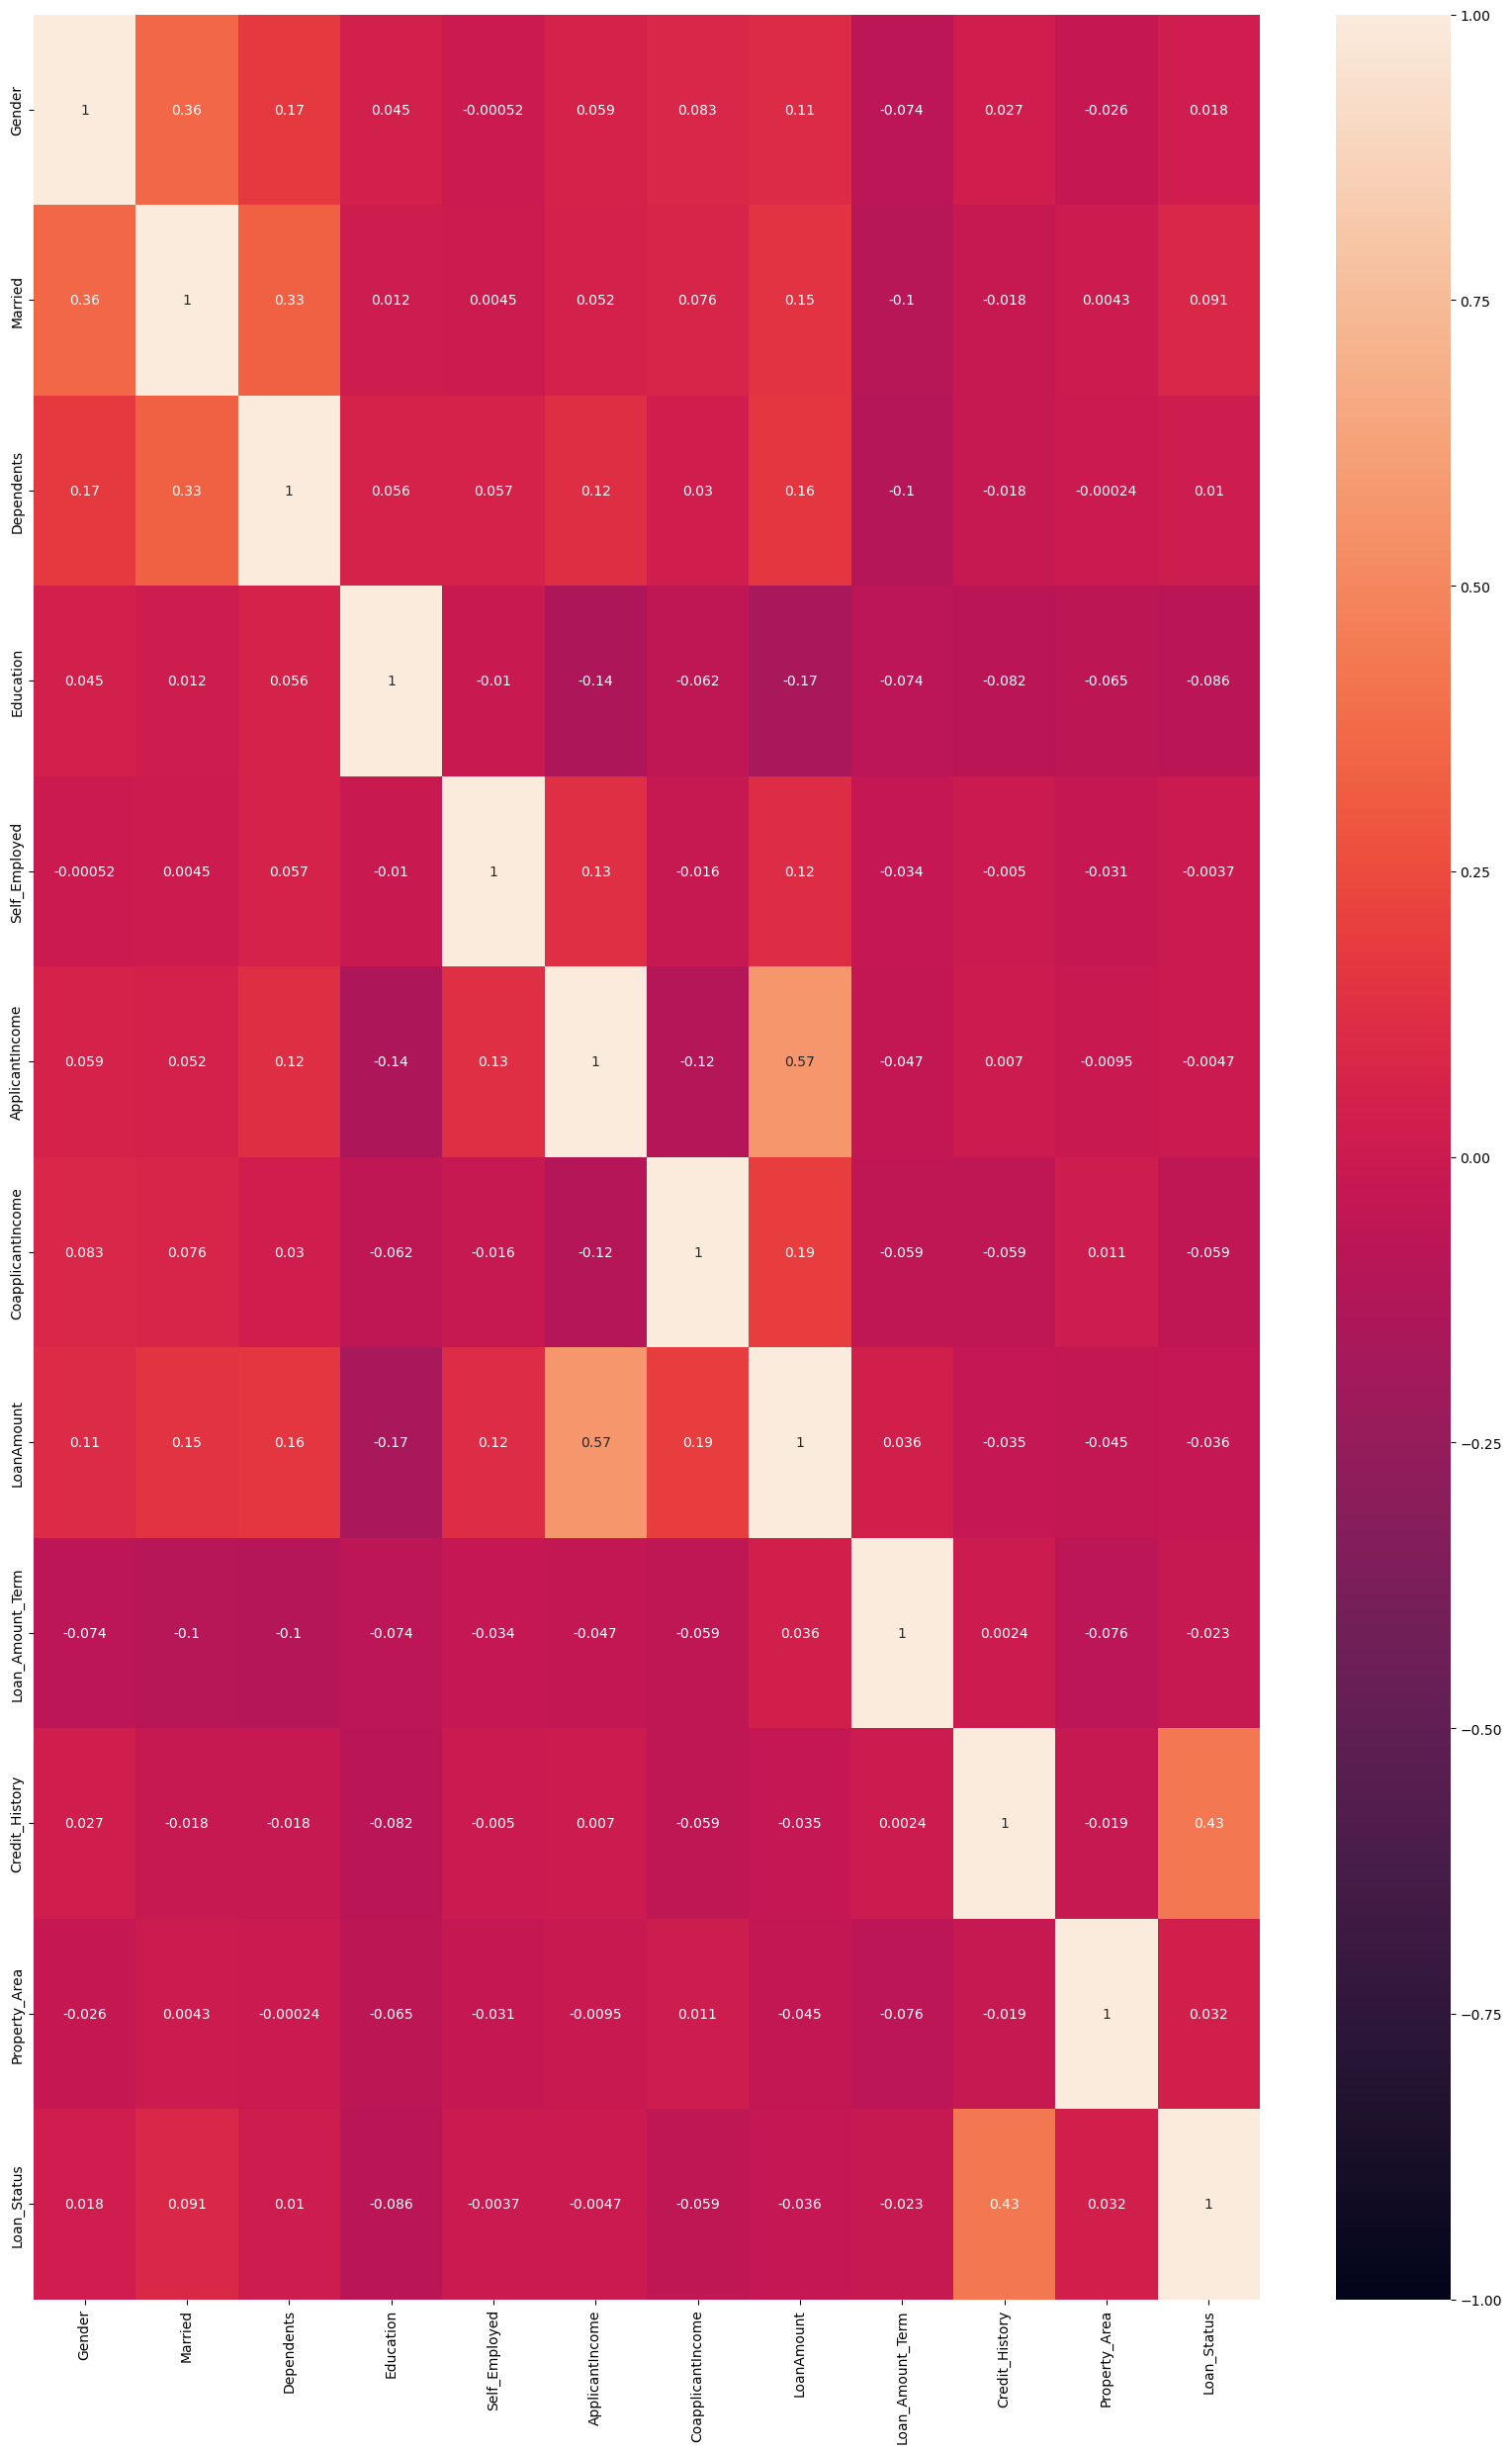

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,30))
sns.heatmap(train_data.corr(),vmin=-1.0,vmax=1.0,annot=True)

### **<font color = blue>4. Splitting Training & Testing data</font>**

Now that we checked for correlation as well, we can go ahead ans split the data.

One thing we have to remember here is that the train & test data are already split and given to us.

So here instead of splitting in X & Y and then applying train test split, we are directly defining our X_train & Y_train.

In the code below astype(int) will return the integer value of the last column of train data (since Y_train = train_data.values[:,-1] ).

In [ ]:
X_train = train_data.values[:,0:-1]
Y_train = train_data.values[:,-1]
Y_train = Y_train.astype(int)

In [ ]:
X_train.shape

(614, 11)

We are NOT splitting the test data here since we do not have any dependent column y present. Here we are keeping the test data as it is.


In [ ]:
X_test = test_data.values[:,:]

In [ ]:
X_test.shape

(367, 11)

### **<font color = blue>5. Scaling the data</font>**

To avoid any further bias, we scale both the train & test data.

Scaling is done using StandardScaler() function from preprocessing sublibrary present in sklearn's library.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[ 0.47234264 -1.37208932 -0.73780632 ...  0.2732313   0.54095432
   1.22329839]
 [ 0.47234264  0.72881553  0.25346957 ...  0.2732313   0.54095432
  -1.31851281]
 [ 0.47234264  0.72881553 -0.73780632 ...  0.2732313   0.54095432
   1.22329839]
 ...
 [ 0.47234264  0.72881553  0.25346957 ...  0.2732313   0.54095432
   1.22329839]
 [ 0.47234264  0.72881553  1.24474546 ...  0.2732313   0.54095432
   1.22329839]
 [-2.11710719 -1.37208932 -0.73780632 ...  0.2732313  -1.84858491
  -0.04760721]]


In [ ]:
print(X_test)

[[ 0.47234264  0.72881553 -0.73780632 ...  0.2732313   0.54095432
   1.22329839]
 [ 0.47234264  0.72881553  0.25346957 ...  0.2732313   0.54095432
   1.22329839]
 [ 0.47234264  0.72881553  1.24474546 ...  0.2732313   0.54095432
   1.22329839]
 ...
 [ 0.47234264 -1.37208932 -0.73780632 ...  0.2732313  -1.84858491
  -0.04760721]
 [ 0.47234264  0.72881553 -0.73780632 ...  0.2732313   0.54095432
  -1.31851281]
 [ 0.47234264 -1.37208932 -0.73780632 ... -2.52283563  0.54095432
  -1.31851281]]


### **<font color = blue>6. SVM fitting the model</font>**

In SVM we have 3 hyperparameters: C (Cost penalty), Kernel & gamma.

The values '(kernel ='rbf',C=20, gamma =0.01)' are base values of the model & if one is changing these base values, then one is performing
Hyperparameter tuning. Hyperparameter tuning improves the accuracy of the model.

We are importing 'SVC' function from 'svm' sublibrary present in sklearn's library. We go ahead and fit this model containing hyperparameters on training data (i.e. X_train & Y_train).

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(kernel ='rbf',C=20, gamma =0.01)
svc_model.fit(X_train,Y_train)

SVC(C=20, gamma=0.01)

### **<font color = blue>7. Predicting Y based on X_test</font>**

Once trained the model, let us do the predictions (Y_pred) on test data (i.e. X_test).

We further print the zip list of Y_pred. The 1s and 0s are basically 'Yes' and 'No's.

In [ ]:
Y_pred = svc_model.predict(X_test)
print(list(Y_pred))

[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 

### **<font color = blue>8. Evaluation of the model</font>**

To evaluate the model we make use of confusion_matrix & classification_report.

In [ ]:
svc_model.score(X_train,Y_train)

0.7768729641693811

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

Y_pred_new=svc_model.predict(X_train)
confusion_matrix(Y_train, Y_pred_new)

print (classification_report(Y_train, Y_pred_new) )

              precision    recall  f1-score   support

           0       0.70      0.51      0.59       192
           1       0.80      0.90      0.85       422

    accuracy                           0.78       614
   macro avg       0.75      0.70      0.72       614
weighted avg       0.77      0.78      0.77       614



Here we are not getting any accuracy score, because our test data do not consist of any Y-values.

### **<font color = blue>9. Adding Y-predictions column to the test data to display Eligibilty/Non-Eligbility</font>**

In [ ]:
test_data=pd.read_csv(r'risk_analytics_test.csv', header=0)
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3.0,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0.0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0.0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0.0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


We are then adding a column 'Y_predictions' in our existing test data to display the results of 'Y_pred'.

In [ ]:
test_data["Y_predictions"]=Y_pred
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Y_predictions
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


### **<font color = blue>10. Mapping Eligibilty: "1"/Non-Eligbility: "0" in Y_predictions col</font>**

Lastly we map the value '1' as 'Eligible' and '0' as 'Not Eligible' in the 'Y_predictions' column.

In [ ]:
test_data["Y_predictions"]=test_data["Y_predictions"]. map({1:"Eligible", 0:"Not Eligible"})
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Y_predictions
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Eligible
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Eligible
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Eligible
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Not Eligible
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Eligible


### **<font color = blue>11. Outsourcing the Loan elibilty test data to the client</font>**

We can then outsource or save this file as a csv file using the following command.

In [ ]:
test_data.to_csv(r'test_data_output.csv',index=False)


In [ ]:
test_data.Y_predictions.value_counts()

Y_predictions
Eligible        280
Not Eligible     87
Name: count, dtype: int64